# Heatmap

## Import Library

In [599]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools import add_constant
from sklearn.preprocessing import MinMaxScaler

pd.options.display.max_columns = None

In [600]:
# Import Data

df1 = pd.read_csv('D:\GitHub\TheOX027\Premier-League-2022-2023-Streamlit-App\History Matches\epl_06_07.csv')
df2 = pd.read_csv('D:\GitHub\TheOX027\Premier-League-2022-2023-Streamlit-App\History Matches\epl_07_08.csv')
df3 = pd.read_csv('D:\GitHub\TheOX027\Premier-League-2022-2023-Streamlit-App\History Matches\epl_08_09.csv')
df4 = pd.read_csv('D:\GitHub\TheOX027\Premier-League-2022-2023-Streamlit-App\History Matches\epl_09_10.csv')
df5 = pd.read_csv('D:\GitHub\TheOX027\Premier-League-2022-2023-Streamlit-App\History Matches\epl_10_11.csv')
df6 = pd.read_csv('D:\GitHub\TheOX027\Premier-League-2022-2023-Streamlit-App\History Matches\epl_11_12.csv')
df7 = pd.read_csv('D:\GitHub\TheOX027\Premier-League-2022-2023-Streamlit-App\History Matches\epl_12_13.csv')
df8 = pd.read_csv('D:\GitHub\TheOX027\Premier-League-2022-2023-Streamlit-App\History Matches\epl_13_14.csv')
df9 = pd.read_csv('D:\GitHub\TheOX027\Premier-League-2022-2023-Streamlit-App\History Matches\epl_14_15.csv')
df10 = pd.read_csv('D:\GitHub\TheOX027\Premier-League-2022-2023-Streamlit-App\History Matches\epl_15_16.csv')
df11 = pd.read_csv('D:\GitHub\TheOX027\Premier-League-2022-2023-Streamlit-App\History Matches\epl_16_17.csv')
df12 = pd.read_csv('D:\GitHub\TheOX027\Premier-League-2022-2023-Streamlit-App\History Matches\epl_17_18.csv')
df13 = pd.read_csv('D:\GitHub\TheOX027\Premier-League-2022-2023-Streamlit-App\History Matches\epl_18_19.csv')
df14 = pd.read_csv('D:\GitHub\TheOX027\Premier-League-2022-2023-Streamlit-App\History Matches\epl_19_20.csv')
df15 = pd.read_csv('D:\GitHub\TheOX027\Premier-League-2022-2023-Streamlit-App\History Matches\epl_20_21.csv')
df16 = pd.read_csv('D:\GitHub\TheOX027\Premier-League-2022-2023-Streamlit-App\History Matches\epl_21_22.csv')
df17 = pd.read_csv('D:\GitHub\TheOX027\Premier-League-2022-2023-Streamlit-App\History Matches\epl_22_23.csv')

In [601]:
# Merge dataset
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17], ignore_index=True)

In [602]:
df.head()

,date,season,venue,home_team,away_team,ht_home_score,ht_away_score,home_score,away_score,home_possession_%,away_possession_%,home_shots_on_target,away_shots_on_target,home_shots,away_shots,home_touches,away_touches,home_passes,away_passes,home_tackles,away_tackles,home_clearances,away_clearances,home_corners,away_corners,home_offsides,away_offsides,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_fouls,away_fouls,referee
0,19/08/2006,06/07,"Bramall Lane, Sheffield",Sheffield United,Liverpool,0,0,1,1,0.41,0.58,1,4,6,15,451,569,272,366,22,29,64,39,0,12,3,5,1,2,0,0,12,17,Rob Styles
1,19/08/2006,06/07,"Fratton Park, Portsmouth",Portsmouth,Blackburn Rovers,1,0,3,0,0.44,0.55,11,3,21,8,415,527,279,327,23,19,15,28,6,2,5,0,2,0,0,1,22,17,Alan Wiley
2,19/08/2006,06/07,"Goodison Park, Liverpool",Everton,Watford,1,0,2,1,0.46,0.53,2,7,8,13,460,493,288,321,17,24,61,32,0,6,5,1,2,2,0,0,12,15,Peter Walton
3,19/08/2006,06/07,"Sports Direct Arena, Newcastle",Newcastle United,Wigan Athletic,1,0,2,1,0.55,0.44,5,4,8,13,519,448,352,278,27,33,15,16,4,11,6,3,1,2,0,0,18,19,Martin Atkinson
4,19/08/2006,06/07,"Madejski Stadium, Reading",Reading,Middlesbrough,2,2,3,2,0.52,0.47,8,7,14,11,515,441,335,328,23,28,9,18,8,2,0,1,1,3,0,0,7,16,Mark Halsey


In [603]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6404 entries, 0 to 6403
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  6404 non-null   object 
 1   season                6404 non-null   object 
 2   venue                 6404 non-null   object 
 3   home_team             6404 non-null   object 
 4   away_team             6404 non-null   object 
 5   ht_home_score         6404 non-null   int64  
 6   ht_away_score         6404 non-null   int64  
 7   home_score            6404 non-null   int64  
 8   away_score            6404 non-null   int64  
 9   home_possession_%     6404 non-null   float64
 10  away_possession_%     6404 non-null   float64
 11  home_shots_on_target  6404 non-null   int64  
 12  away_shots_on_target  6404 non-null   int64  
 13  home_shots            6404 non-null   int64  
 14  away_shots            6404 non-null   int64  
 15  home_touches         

## Feature Engineering

### Drop Features

In [604]:
# df_date_venue = df[['date','venue']]

In [605]:
# df.drop(['date', 'venue'], axis=1, inplace=True)
# df.head()

### Mapping Football Match Result

In [606]:
df['result'] = 'D' 
df.loc[df['home_score'] > df['away_score'], 'result'] = 'W'  
df.loc[df['home_score'] < df['away_score'], 'result'] = 'L'  

In [607]:
# df.drop(['home_score', 'away_score'], axis=1, inplace=True)
df.head(10)

,date,season,venue,home_team,away_team,ht_home_score,ht_away_score,home_score,away_score,home_possession_%,away_possession_%,home_shots_on_target,away_shots_on_target,home_shots,away_shots,home_touches,away_touches,home_passes,away_passes,home_tackles,away_tackles,home_clearances,away_clearances,home_corners,away_corners,home_offsides,away_offsides,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_fouls,away_fouls,referee,result
0,19/08/2006,06/07,"Bramall Lane, Sheffield",Sheffield United,Liverpool,0,0,1,1,0.41,0.58,1,4,6,15,451,569,272,366,22,29,64,39,0,12,3,5,1,2,0,0,12,17,Rob Styles,D
1,19/08/2006,06/07,"Fratton Park, Portsmouth",Portsmouth,Blackburn Rovers,1,0,3,0,0.44,0.55,11,3,21,8,415,527,279,327,23,19,15,28,6,2,5,0,2,0,0,1,22,17,Alan Wiley,W
2,19/08/2006,06/07,"Goodison Park, Liverpool",Everton,Watford,1,0,2,1,0.46,0.53,2,7,8,13,460,493,288,321,17,24,61,32,0,6,5,1,2,2,0,0,12,15,Peter Walton,W
3,19/08/2006,06/07,"Sports Direct Arena, Newcastle",Newcastle United,Wigan Athletic,1,0,2,1,0.55,0.44,5,4,8,13,519,448,352,278,27,33,15,16,4,11,6,3,1,2,0,0,18,19,Martin Atkinson,W
4,19/08/2006,06/07,"Madejski Stadium, Reading",Reading,Middlesbrough,2,2,3,2,0.52,0.47,8,7,14,11,515,441,335,328,23,28,9,18,8,2,0,1,1,3,0,0,7,16,Mark Halsey,W
5,19/08/2006,06/07,"Boleyn Ground, London",West Ham,Charlton Athletic,0,1,3,1,0.62,0.37,6,3,20,5,605,436,461,279,20,34,7,44,6,0,0,2,2,1,0,1,18,14,Howard Webb,W
6,19/08/2006,06/07,"Emirates Stadium, London",Arsenal,Aston Villa,0,0,1,1,0.72,0.27,7,3,24,6,807,417,631,232,22,33,14,51,18,1,2,6,1,2,0,0,10,19,Graham Poll,D
7,19/08/2006,06/07,"University of Bolton Stadium, Bolton",Bolton Wanderers,Tottenham,2,0,2,0,0.37,0.62,4,2,13,10,411,591,243,427,28,17,20,43,6,3,3,1,0,0,0,0,22,22,Phil Dowd,W
8,20/08/2006,06/07,"Stamford Bridge, London",Chelsea,Man City,2,0,3,0,0.58,0.41,3,2,14,8,702,543,516,361,18,40,37,41,5,2,3,4,1,2,0,1,7,16,Stephen Bennett,W
9,20/08/2006,06/07,"Old Trafford, Manchester",Manchester United,Fulham,4,1,5,1,0.65,0.35,8,6,18,16,759,484,570,292,29,29,33,32,5,2,2,1,1,1,0,0,15,21,Andre Marriner,W


In [608]:
df['home_team'].unique()

array(['Sheffield United', 'Portsmouth', 'Everton', 'Newcastle United',
       'Reading', 'West Ham', 'Arsenal', 'Bolton Wanderers', 'Chelsea',
       'Manchester United', 'Watford', 'Tottenham', 'Aston Villa',
       'Blackburn Rovers', 'Charlton Athletic', 'Fulham', 'Middlesbrough',
       'Man City', 'Wigan Athletic', 'Liverpool', 'Derby County',
       'Sunderland', 'Birmingham City', 'Hull City', 'Stoke', 'West Brom',
       'Burnley', 'Wolverhampton Wanderers', 'Blackpool',
       'Queens Park Rangers', 'Swansea', 'Norwich City', 'Southampton',
       'Crystal Palace', 'Cardiff City', 'Leicester', 'Bournemouth',
       'Brighton', 'Huddersfield', 'Leeds', 'Brentford',
       'Manchester City', 'Nottingham Forest'], dtype=object)

### Combine & Create New Features

In [609]:
# List tim-tim yang memiliki derby
derby_teams = [
    ['Liverpool', 'Everton'],
    ['Arsenal', 'Tottenham'],
    ['Aston Villa', 'Birmingham City', 'Wolverhampton Wanderers'],
    ['Manchester United', 'Manchester City'],
    ['Newcastle United', 'Sunderland'],
    ['Portsmouth', 'Southampton'],
    ['Chelsea', 'Fulham', 'Queens Park Rangers'],
    ['Derby County', 'Leicester', 'Nottingham Forest'],
    ['Blackburn Rovers', 'Bolton Wanderers', 'Burnley', 'Blackpool'],
    ['Middlesbrough', 'Sunderland'],
    ['Stoke City', 'Port Vale'],
    ['Leeds United', 'Huddersfield Town'],
    ['Sheffield United', 'Sheffield Wednesday'],
    ['Norwich City', 'Ipswich Town'],
    ['Cardiff City', 'Swansea City'],
    ['Southampton', 'Portsmouth'],
    ['Bristol City', 'Bristol Rovers'],
    ['Nottingham Forest', 'Notts County']
]

# Fungsi untuk menentukan apakah pertandingan adalah derby
def is_derby(home_team, away_team):
    for derby_pair in derby_teams:
        if home_team in derby_pair and away_team in derby_pair:
            return True
    return False

# Menentukan apakah setiap pertandingan dalam df adalah derby atau bukan
is_derby_list = [is_derby(home, away) for home, away in zip(df['home_team'], df['away_team'])]

df['is_derby'] = is_derby_list
df['is_derby'] = df['is_derby'].astype(str)

In [610]:
# Total Cards
df['total_red_cards'] = df['home_red_cards'] + df['away_red_cards']
df['total_yellow_cards'] = df['home_yellow_cards'] + df['away_yellow_cards']

# Total Fouls per Game
df['total_fouls'] = df['home_fouls'] + df['away_fouls']

# Total Corners
df['total_corners'] = df['home_corners'] + df['away_corners']

# Total offsides
df['total_offsides'] = df['home_offsides'] + df['away_offsides']

# Total tackles
df['total_tackles'] = df['home_tackles'] + df['away_tackles']

# Total clearances
df['total_clearances'] = df['home_clearances'] + df['away_clearances']

# Total passes
df['total_passes'] = df['home_passes'] + df['away_passes']

# Total passes
df['total_touches'] = df['home_passes'] + df['away_passes']

In [611]:
# Home and Away Goal Ratio
df['home_goal_ratio'] = df['home_score'] / df['home_score'].sum()
df['away_goal_ratio'] = df['away_score'] / df['away_score'].sum()

# Goal-to-Shot Ratio
df['home_goal_to_shot_ratio'] = df['home_score'] / df['home_shots']
df['away_goal_to_shot_ratio'] = df['away_score'] / df['away_shots']

# Total Score in Previous Match
df['total_score_previous_match'] = df.groupby(['home_team', 'away_team'])['home_score'].shift(1) + df.groupby(['home_team', 'away_team'])['away_score'].shift(1)

# Successful Passes Ratio
df['successful_passes_home'] = df['home_passes'] - df['home_clearances']
df['successful_passes_away'] = df['away_passes'] - df['away_clearances']

df['successful_passes_ratio_home'] = df['successful_passes_home'] / df['home_passes']
df['successful_passes_ratio_away'] = df['successful_passes_away'] / df['away_passes']

# Performance Improvement/Deterioration
df['performance_change'] = df['home_score'] - df.groupby('home_team')['home_score'].rolling(window=5, min_periods=1).mean().reset_index(0, drop=True)

In [612]:
# Recent Form (Win, Draw, Loss)
df['recent_form_home'] = df['home_score'].rolling(window=5, min_periods=1).sum().reset_index(0, drop=True)
df['recent_form_away'] = df['away_score'].rolling(window=5, min_periods=1).sum().reset_index(0, drop=True)

# Streak (Winning, Drawing, Losing)
df['win_streak_home'] = (df['home_score'] > df['away_score']).groupby(df['home_team']).cumsum()
df['win_streak_away'] = (df['away_score'] > df['home_score']).groupby(df['away_team']).cumsum()

# Average Goals at Venue
df['avg_goals_at_venue'] = df.groupby('venue')['home_score'].expanding().mean().reset_index(0, drop=True)

In [613]:
# Konversi kolom date menjadi datetime
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
# Menghitung jarak waktu dengan pertandingan sebelumnya
df['time_since_previous_match'] = df['date'] - df.groupby(['home_team', 'away_team'])['date'].shift(1)
df['time_since_previous_match'] = df['time_since_previous_match'].astype(str)

# Untuk melabeli suatu pertandingan sedang dalam musim apa
def determine_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

# Menambahkan kolom musim ke dataframe
df['match_month'] = pd.to_datetime(df['date'], format='%d/%m/%Y').dt.month
df['season_game'] = df['match_month'].apply(determine_season)

In [614]:
# Shots on Target Ratio
df['home_shots_on_target_ratio'] = df['home_shots_on_target'] / df['home_shots']
df['away_shots_on_target_ratio'] = df['away_shots_on_target'] / df['away_shots']

# Referee Experience Matches
referee_experience = df['referee'].value_counts().to_dict()
df['referee_experience'] = df['referee'].map(referee_experience)

# Disciplinary Points
df['home_disciplinary_points'] = (df['home_yellow_cards'] * 1) + (df['home_red_cards'] * 3)
df['away_disciplinary_points'] = (df['away_yellow_cards'] * 1) + (df['away_red_cards'] * 3)

# Unbeaten Streak
df['unbeaten_streak'] = (df['home_score'] >= df['away_score']).groupby(df['home_team']).cumsum()

# SoT per Possession
df['shots_on_target_per_possession'] = (df['home_shots_on_target'] + df['away_shots_on_target']) / (df['home_possession_%'] + df['away_possession_%'])

# Possession to Shot Ratio
df['possession_to_shot_ratio'] = (df['home_possession_%'] + df['away_possession_%']) / (df['home_shots'] + df['away_shots'])

In [615]:
# Membuat kolom hasil pertandingan sebelumnya untuk setiap tim
for i in range(1, 6):
    df[f'prev_match_{i}_result_home'] = np.where(df.groupby('home_team')['home_score'].shift(i) > df.groupby('home_team')['away_score'].shift(i), 'W', np.where(df.groupby('home_team')['home_score'].shift(i) == df.groupby('home_team')['away_score'].shift(i), 'D', 'L'))
    df[f'prev_match_{i}_result_away'] = np.where(df.groupby('away_team')['away_score'].shift(i) > df.groupby('away_team')['home_score'].shift(i), 'W', np.where(df.groupby('away_team')['away_score'].shift(i) == df.groupby('away_team')['home_score'].shift(i), 'D', 'L'))

# Menentukan jumlah poin untuk setiap hasil pertandingan
points_mapping = {'W': 3, 'D': 1, 'L': 0}

# Membuat kolom poin untuk setiap hasil pertandingan sebelumnya
for i in range(1, 6):
    df[f'prev_match_{i}_points_home'] = df[f'prev_match_{i}_result_home'].map(points_mapping)
    df[f'prev_match_{i}_points_away'] = df[f'prev_match_{i}_result_away'].map(points_mapping)

# Membuat kolom jumlah total poin dari 5 pertandingan sebelumnya
df['total_points_prev_matches_home'] = df[[f'prev_match_{i}_points_home' for i in range(1, 6)]].sum(axis=1)
df['total_points_prev_matches_away'] = df[[f'prev_match_{i}_points_away' for i in range(1, 6)]].sum(axis=1)

df['avg_points_prev_matches_home'] = df['total_points_prev_matches_home'] / 5
df['avg_points_prev_matches_away'] = df['total_points_prev_matches_away'] / 5

# Hapus kolom-kolom hasil pertandingan sebelumnya dalam bentuk selisih gol dan poin
df.drop([f'prev_match_{i}_result_home' for i in range(1, 6)] + [f'prev_match_{i}_result_away' for i in range(1, 6)] +
        [f'prev_match_{i}_points_home' for i in range(1, 6)] + [f'prev_match_{i}_points_away' for i in range(1, 6)], axis=1, inplace=True)

In [616]:
df['goal_difference'] = df['home_score'] - df['away_score']
df['possession_growth'] = df['away_possession_%'] - df['home_possession_%']
df['average_goals_per_match'] = (df['home_score'] + df['away_score']) / 2

df['home_tackles_ratio'] = df['home_tackles'] / (df['home_tackles'] + df['away_tackles'])
df['away_tackles_ratio'] = df['away_tackles'] / (df['home_tackles'] + df['away_tackles'])

df['average_cards_per_match'] = (df['home_yellow_cards'] + df['away_yellow_cards'] + df['home_red_cards'] + df['away_red_cards']) / 2

df['home_red_card_ratio'] = df['home_red_cards'] / (df['home_red_cards'] + df['away_red_cards'])
df['home_yellow_card_ratio'] = df['home_yellow_cards'] / df['home_yellow_cards'] + df['away_yellow_cards']

df['home_yellow_card_ratio'] = df['away_red_cards'] / (df['home_red_cards'] + df['away_red_cards'])
df['away_yellow_card_ratio'] = df['away_yellow_cards'] / (df['home_yellow_cards'] + df['away_yellow_cards'])

In [617]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6404 entries, 0 to 6403
Data columns (total 84 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            6404 non-null   datetime64[ns]
 1   season                          6404 non-null   object        
 2   venue                           6404 non-null   object        
 3   home_team                       6404 non-null   object        
 4   away_team                       6404 non-null   object        
 5   ht_home_score                   6404 non-null   int64         
 6   ht_away_score                   6404 non-null   int64         
 7   home_score                      6404 non-null   int64         
 8   away_score                      6404 non-null   int64         
 9   home_possession_%               6404 non-null   float64       
 10  away_possession_%               6404 non-null   float64       
 11  home

In [618]:
df.head()

,date,season,venue,home_team,away_team,ht_home_score,ht_away_score,home_score,away_score,home_possession_%,away_possession_%,home_shots_on_target,away_shots_on_target,home_shots,away_shots,home_touches,away_touches,home_passes,away_passes,home_tackles,away_tackles,home_clearances,away_clearances,home_corners,away_corners,home_offsides,away_offsides,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_fouls,away_fouls,referee,result,is_derby,total_red_cards,total_yellow_cards,total_fouls,total_corners,total_offsides,total_tackles,total_clearances,total_passes,total_touches,home_goal_ratio,away_goal_ratio,home_goal_to_shot_ratio,away_goal_to_shot_ratio,total_score_previous_match,successful_passes_home,successful_passes_away,successful_passes_ratio_home,successful_passes_ratio_away,performance_change,recent_form_home,recent_form_away,win_streak_home,win_streak_away,avg_goals_at_venue,time_since_previous_match,match_month,season_game,home_shots_on_target_ratio,away_shots_on_target_ratio,referee_experience,home_disciplinary_points,away_disciplinary_points,unbeaten_streak,shots_on_target_per_possession,possession_to_shot_ratio,total_points_prev_matches_home,total_points_prev_matches_away,avg_points_prev_matches_home,avg_points_prev_matches_away,goal_difference,possession_growth,average_goals_per_match,home_tackles_ratio,away_tackles_ratio,average_cards_per_match,home_red_card_ratio,home_yellow_card_ratio,away_yellow_card_ratio
0,2006-08-19,06/07,"Bramall Lane, Sheffield",Sheffield United,Liverpool,0,0,1,1,0.41,0.58,1,4,6,15,451,569,272,366,22,29,64,39,0,12,3,5,1,2,0,0,12,17,Rob Styles,D,False,0,3,29,12,8,51,103,638,638,0.000102,0.000132,0.166667,0.066667,NaN,208,327,0.764706,0.893443,0.0,1.0,1.0,0,0,1.0,NaT,8,Summer,0.166667,0.266667,83,1,2,1,5.050505,0.047143,0,0,0.0,0.0,0,0.17,1.0,0.431373,0.568627,1.5,NaN,NaN,0.666667
1,2006-08-19,06/07,"Fratton Park, Portsmouth",Portsmouth,Blackburn Rovers,1,0,3,0,0.44,0.55,11,3,21,8,415,527,279,327,23,19,15,28,6,2,5,0,2,0,0,1,22,17,Alan Wiley,W,False,1,2,39,8,5,42,43,606,606,0.000306,0.000000,0.142857,0.000000,NaN,264,299,0.946237,0.914373,0.0,4.0,1.0,1,0,3.0,NaT,8,Summer,0.523810,0.375000,114,2,3,1,14.141414,0.034138,0,0,0.0,0.0,3,0.11,1.5,0.547619,0.452381,1.5,0.0,1.0,0.000000
2,2006-08-19,06/07,"Goodison Park, Liverpool",Everton,Watford,1,0,2,1,0.46,0.53,2,7,8,13,460,493,288,321,17,24,61,32,0,6,5,1,2,2,0,0,12,15,Peter Walton,W,False,0,4,27,6,6,41,93,609,609,0.000204,0.000132,0.250000,0.076923,NaN,227,289,0.788194,0.900312,0.0,6.0,2.0,1,0,2.0,NaT,8,Summer,0.250000,0.538462,134,2,2,1,9.090909,0.047143,0,0,0.0,0.0,1,0.07,1.5,0.414634,0.585366,2.0,NaN,NaN,0.500000
3,2006-08-19,06/07,"Sports Direct Arena, Newcastle",Newcastle United,Wigan Athletic,1,0,2,1,0.55,0.44,5,4,8,13,519,448,352,278,27,33,15,16,4,11,6,3,1,2,0,0,18,19,Martin Atkinson,W,False,0,3,37,15,9,60,31,630,630,0.000204,0.000132,0.250000,0.076923,NaN,337,262,0.957386,0.942446,0.0,8.0,3.0,1,0,2.0,NaT,8,Summer,0.625000,0.307692,441,1,2,1,9.090909,0.047143,0,0,0.0,0.0,1,-0.11,1.5,0.450000,0.550000,1.5,NaN,NaN,0.666667
4,2006-08-19,06/07,"Madejski Stadium, Reading",Reading,Middlesbrough,2,2,3,2,0.52,0.47,8,7,14,11,515,441,335,328,23,28,9,18,8,2,0,1,1,3,0,0,7,16,Mark Halsey,W,False,0,4,23,10,1,51,27,663,663,0.000306,0.000265,0.214286,0.181818,NaN,326,310,0.973134,0.945122,0.0,11.0,5.0,1,0,3.0,NaT,8,Summer,0.571429,0.636364,139,1,3,1,15.151515,0.039600,0,0,0.0,0.0,1,-0.05,2.5,0.450980,0.549020,2.0,NaN,NaN,0.750000


In [619]:
df['recent_form_home']
df['recent_form_away']
df['performance_change']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
6399    0.8
6400   -0.2
6401   -0.8
6402    0.2
6403   -0.2
Name: performance_change, Length: 6404, dtype: float64

## Drop & Manipulation Features

In [620]:
df.drop(['date','home_score', 'away_score'], axis=1, inplace=True)

In [621]:
df['time_since_previous_match'] = df['time_since_previous_match'].replace('NaT', 0)

# Menghapus kata 'days' dan mengubah nilai menjadi integer, mengatasi nilai NaN
df['time_since_previous_match'] = df['time_since_previous_match'].replace({' days': ''}, regex=True).astype(float).fillna(0).astype(int)
df['time_since_previous_match'].unique()

array([   0,  329,  228,  146,  224,  322,  105,  225,  353,  305,  102,
        357,  130,  199,  327,  238,  243,  218,  211,  106,  196,  308,
        126,  262,  351,  145,  378,  350,  260,  168,  140,  147,  182,
        227,  141,  235,  166,  246,  301,  400,  210,  174,  328,  273,
        336,  278,  279,  284,  245,  312,  190,  379,  342,  189,  160,
        423,  259,  406,  303,  180,  433,  171,  343,  315,  286,  183,
        421,  274,  386,  294,  392,  287,  266,  469,  335,  470,  240,
        230,  267,  309,  348,  288,  388,  420,  385,  389,  483,  403,
        304,  452,  465,  451,  341,  272,  405,  381,  333,  377,  444,
        269,  290,  256,  277,  364,  280,  507,  468,  416,  461,  484,
        450,  447,  437,  352,  365,  363,  427,  528,  525,  337,  531,
        391,  428,  511,  415,  418,  311,  490,  371,  560,  318,  302,
        519,  557,  462,  535,  544,  504,  473,  497,  503,  553,  498,
        344,  455,  500,  368,  538,  434,  475,  5

In [622]:
le = LabelEncoder()
df['home_team'] = le.fit_transform(df['home_team'])
df['away_team'] = le.transform(df['away_team'])
df['referee'] = le.fit_transform(df['referee'])
df['season_game'] = le.fit_transform(df['season_game'])

ordinal_mapping = {
    'result': {'W': 0, 'D': 1, 'L': 2},
    'derby_result': {'False': 0, 'True': 1},
    'season' : {'Summer' : 0, 'Autumn':1, 'Winter':2, 'Spring':3}
}

df['result'] = df['result'].map(ordinal_mapping['result'])
df['is_derby'] = df['is_derby'].map(ordinal_mapping['derby_result'])

# for i in range(1, 6):
#     df[f'prev_match_{i}_result_home'] = df[f'prev_match_{i}_result_home'].map(ordinal_mapping['result'])
#     df[f'prev_match_{i}_result_away'] = df[f'prev_match_{i}_result_away'].map(ordinal_mapping['result'])


In [623]:
from sklearn.preprocessing import MinMaxScaler

# Menentukan kolom-kolom yang akan di-MinMax Scaling
columns_to_scale = df.select_dtypes(include=['int32', 'int64', 'float64']).columns
scaler = MinMaxScaler()

# Melakukan Min-Max Scaling pada kolom-kolom tersebut
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df.head()

,season,venue,home_team,away_team,ht_home_score,ht_away_score,home_possession_%,away_possession_%,home_shots_on_target,away_shots_on_target,home_shots,away_shots,home_touches,away_touches,home_passes,away_passes,home_tackles,away_tackles,home_clearances,away_clearances,home_corners,away_corners,home_offsides,away_offsides,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_fouls,away_fouls,referee,result,is_derby,total_red_cards,total_yellow_cards,total_fouls,total_corners,total_offsides,total_tackles,total_clearances,total_passes,total_touches,home_goal_ratio,away_goal_ratio,home_goal_to_shot_ratio,away_goal_to_shot_ratio,total_score_previous_match,successful_passes_home,successful_passes_away,successful_passes_ratio_home,successful_passes_ratio_away,performance_change,recent_form_home,recent_form_away,win_streak_home,win_streak_away,avg_goals_at_venue,time_since_previous_match,match_month,season_game,home_shots_on_target_ratio,away_shots_on_target_ratio,referee_experience,home_disciplinary_points,away_disciplinary_points,unbeaten_streak,shots_on_target_per_possession,possession_to_shot_ratio,total_points_prev_matches_home,total_points_prev_matches_away,avg_points_prev_matches_home,avg_points_prev_matches_away,goal_difference,possession_growth,average_goals_per_match,home_tackles_ratio,away_tackles_ratio,average_cards_per_match,home_red_card_ratio,home_yellow_card_ratio,away_yellow_card_ratio
0,06/07,"Bramall Lane, Sheffield",0.761905,0.500000,0.0,0.0,0.369231,0.630769,0.058824,0.266667,0.136364,0.454545,0.140606,0.334550,0.136047,0.263285,0.422222,0.553191,0.598131,0.296875,0.0,0.631579,0.214286,0.416667,0.142857,0.222222,0.0,0.0,0.352941,0.571429,0.750000,0.5,0.0,0.000000,0.250000,0.571429,0.48,0.444444,0.512821,0.419811,0.246646,0.246646,0.111111,0.111111,0.166667,0.066667,NaN,0.111235,0.265589,0.465015,0.794782,0.408163,0.045455,0.058824,0.000000,0.0,0.2,0.0,0.636364,0.666667,0.166667,0.266667,0.181818,0.111111,0.153846,0.003509,0.20,0.156135,0.0,0.0,0.0,0.0,0.500000,0.630769,0.181818,0.360409,0.639591,0.250000,NaN,NaN,0.666667
1,06/07,"Fratton Park, Portsmouth",0.690476,0.071429,0.2,0.0,0.415385,0.584615,0.647059,0.200000,0.477273,0.242424,0.096970,0.283455,0.144186,0.216184,0.444444,0.340426,0.140187,0.210938,0.3,0.105263,0.357143,0.000000,0.285714,0.000000,0.0,0.5,0.647059,0.571429,0.000000,0.0,0.0,0.333333,0.166667,0.809524,0.32,0.277778,0.397436,0.136792,0.213622,0.213622,0.333333,0.000000,0.142857,0.000000,NaN,0.173526,0.233256,0.877759,0.835755,0.408163,0.181818,0.058824,0.004525,0.0,0.6,0.0,0.636364,0.666667,0.523810,0.375000,0.250554,0.222222,0.230769,0.003509,0.56,0.083388,0.0,0.0,0.0,0.0,0.666667,0.584615,0.272727,0.526137,0.473863,0.250000,0.0,1.0,0.000000
2,06/07,"Goodison Park, Liverpool",0.357143,0.904762,0.2,0.0,0.446154,0.553846,0.117647,0.466667,0.181818,0.393939,0.151515,0.242092,0.154651,0.208937,0.311111,0.446809,0.570093,0.242188,0.0,0.315789,0.357143,0.083333,0.285714,0.222222,0.0,0.0,0.352941,0.500000,0.708333,0.0,0.0,0.000000,0.333333,0.523810,0.24,0.333333,0.384615,0.372642,0.216718,0.216718,0.222222,0.111111,0.250000,0.076923,NaN,0.132369,0.221709,0.518421,0.808228,0.408163,0.272727,0.117647,0.004525,0.0,0.4,0.0,0.636364,0.666667,0.250000,0.538462,0.294900,0.222222,0.153846,0.003509,0.36,0.156135,0.0,0.0,0.0,0.0,0.555556,0.553846,0.272727,0.336546,0.663454,0.333333,NaN,NaN,0.500000
3,06/07,"Sports Direct Arena, Newcastle",0.619048,0.976190,0.2,0.0,0.584615,0.415385,0.294118,0.266667,0.181818,0.393939,0.223030,0.187348,0.229070,0.157005,0.533333,0.638298,0.140187,0.117188,0.2,0.578947,0.428571,0.250000,0.142857,0.222222,0.0,0.0,0.529412,0.642857,0.520833,0.0,0.0,0.000000,0.250000,0.761905,0.60,0.500000,0.628205,0.080189,0.238390,0.238390,0.222222,0.111111,0.250000,0.076923,NaN,0.254727,0.190531,0.903110,0.890709,0.408163,0.363636,0.176471,0.004525,0.0,0.4,0.0,0.636364,0.666667,0.625000,0.307692,0.975610,0.111111,0.153846,0.003509,0.36,0.156135,0.0,0.0,0.0,0.0,0.555556,0.415385,

In [624]:
df.head()

,season,venue,home_team,away_team,ht_home_score,ht_away_score,home_possession_%,away_possession_%,home_shots_on_target,away_shots_on_target,home_shots,away_shots,home_touches,away_touches,home_passes,away_passes,home_tackles,away_tackles,home_clearances,away_clearances,home_corners,away_corners,home_offsides,away_offsides,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_fouls,away_fouls,referee,result,is_derby,total_red_cards,total_yellow_cards,total_fouls,total_corners,total_offsides,total_tackles,total_clearances,total_passes,total_touches,home_goal_ratio,away_goal_ratio,home_goal_to_shot_ratio,away_goal_to_shot_ratio,total_score_previous_match,successful_passes_home,successful_passes_away,successful_passes_ratio_home,successful_passes_ratio_away,performance_change,recent_form_home,recent_form_away,win_streak_home,win_streak_away,avg_goals_at_venue,time_since_previous_match,match_month,season_game,home_shots_on_target_ratio,away_shots_on_target_ratio,referee_experience,home_disciplinary_points,away_disciplinary_points,unbeaten_streak,shots_on_target_per_possession,possession_to_shot_ratio,total_points_prev_matches_home,total_points_prev_matches_away,avg_points_prev_matches_home,avg_points_prev_matches_away,goal_difference,possession_growth,average_goals_per_match,home_tackles_ratio,away_tackles_ratio,average_cards_per_match,home_red_card_ratio,home_yellow_card_ratio,away_yellow_card_ratio
0,06/07,"Bramall Lane, Sheffield",0.761905,0.500000,0.0,0.0,0.369231,0.630769,0.058824,0.266667,0.136364,0.454545,0.140606,0.334550,0.136047,0.263285,0.422222,0.553191,0.598131,0.296875,0.0,0.631579,0.214286,0.416667,0.142857,0.222222,0.0,0.0,0.352941,0.571429,0.750000,0.5,0.0,0.000000,0.250000,0.571429,0.48,0.444444,0.512821,0.419811,0.246646,0.246646,0.111111,0.111111,0.166667,0.066667,NaN,0.111235,0.265589,0.465015,0.794782,0.408163,0.045455,0.058824,0.000000,0.0,0.2,0.0,0.636364,0.666667,0.166667,0.266667,0.181818,0.111111,0.153846,0.003509,0.20,0.156135,0.0,0.0,0.0,0.0,0.500000,0.630769,0.181818,0.360409,0.639591,0.250000,NaN,NaN,0.666667
1,06/07,"Fratton Park, Portsmouth",0.690476,0.071429,0.2,0.0,0.415385,0.584615,0.647059,0.200000,0.477273,0.242424,0.096970,0.283455,0.144186,0.216184,0.444444,0.340426,0.140187,0.210938,0.3,0.105263,0.357143,0.000000,0.285714,0.000000,0.0,0.5,0.647059,0.571429,0.000000,0.0,0.0,0.333333,0.166667,0.809524,0.32,0.277778,0.397436,0.136792,0.213622,0.213622,0.333333,0.000000,0.142857,0.000000,NaN,0.173526,0.233256,0.877759,0.835755,0.408163,0.181818,0.058824,0.004525,0.0,0.6,0.0,0.636364,0.666667,0.523810,0.375000,0.250554,0.222222,0.230769,0.003509,0.56,0.083388,0.0,0.0,0.0,0.0,0.666667,0.584615,0.272727,0.526137,0.473863,0.250000,0.0,1.0,0.000000
2,06/07,"Goodison Park, Liverpool",0.357143,0.904762,0.2,0.0,0.446154,0.553846,0.117647,0.466667,0.181818,0.393939,0.151515,0.242092,0.154651,0.208937,0.311111,0.446809,0.570093,0.242188,0.0,0.315789,0.357143,0.083333,0.285714,0.222222,0.0,0.0,0.352941,0.500000,0.708333,0.0,0.0,0.000000,0.333333,0.523810,0.24,0.333333,0.384615,0.372642,0.216718,0.216718,0.222222,0.111111,0.250000,0.076923,NaN,0.132369,0.221709,0.518421,0.808228,0.408163,0.272727,0.117647,0.004525,0.0,0.4,0.0,0.636364,0.666667,0.250000,0.538462,0.294900,0.222222,0.153846,0.003509,0.36,0.156135,0.0,0.0,0.0,0.0,0.555556,0.553846,0.272727,0.336546,0.663454,0.333333,NaN,NaN,0.500000
3,06/07,"Sports Direct Arena, Newcastle",0.619048,0.976190,0.2,0.0,0.584615,0.415385,0.294118,0.266667,0.181818,0.393939,0.223030,0.187348,0.229070,0.157005,0.533333,0.638298,0.140187,0.117188,0.2,0.578947,0.428571,0.250000,0.142857,0.222222,0.0,0.0,0.529412,0.642857,0.520833,0.0,0.0,0.000000,0.250000,0.761905,0.60,0.500000,0.628205,0.080189,0.238390,0.238390,0.222222,0.111111,0.250000,0.076923,NaN,0.254727,0.190531,0.903110,0.890709,0.408163,0.363636,0.176471,0.004525,0.0,0.4,0.0,0.636364,0.666667,0.625000,0.307692,0.975610,0.111111,0.153846,0.003509,0.36,0.156135,0.0,0.0,0.0,0.0,0.555556,0.415385,

In [625]:
df.iloc[:, :30].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6404 entries, 0 to 6403
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   season                6404 non-null   object 
 1   venue                 6404 non-null   object 
 2   home_team             6404 non-null   float64
 3   away_team             6404 non-null   float64
 4   ht_home_score         6404 non-null   float64
 5   ht_away_score         6404 non-null   float64
 6   home_possession_%     6404 non-null   float64
 7   away_possession_%     6404 non-null   float64
 8   home_shots_on_target  6404 non-null   float64
 9   away_shots_on_target  6404 non-null   float64
 10  home_shots            6404 non-null   float64
 11  away_shots            6404 non-null   float64
 12  home_touches          6404 non-null   float64
 13  away_touches          6404 non-null   float64
 14  home_passes           6404 non-null   float64
 15  away_passes          

In [626]:
df.iloc[:, 30:60].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6404 entries, 0 to 6403
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   referee                       6404 non-null   float64
 1   result                        6404 non-null   float64
 2   is_derby                      6404 non-null   float64
 3   total_red_cards               6404 non-null   float64
 4   total_yellow_cards            6404 non-null   float64
 5   total_fouls                   6404 non-null   float64
 6   total_corners                 6404 non-null   float64
 7   total_offsides                6404 non-null   float64
 8   total_tackles                 6404 non-null   float64
 9   total_clearances              6404 non-null   float64
 10  total_passes                  6404 non-null   float64
 11  total_touches                 6404 non-null   float64
 12  home_goal_ratio               6404 non-null   float64
 13  awa

In [627]:
df.iloc[:, 60:90].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6404 entries, 0 to 6403
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   home_shots_on_target_ratio      6403 non-null   float64
 1   away_shots_on_target_ratio      6402 non-null   float64
 2   referee_experience              6404 non-null   float64
 3   home_disciplinary_points        6404 non-null   float64
 4   away_disciplinary_points        6404 non-null   float64
 5   unbeaten_streak                 6404 non-null   float64
 6   shots_on_target_per_possession  6404 non-null   float64
 7   possession_to_shot_ratio        6404 non-null   float64
 8   total_points_prev_matches_home  6404 non-null   float64
 9   total_points_prev_matches_away  6404 non-null   float64
 10  avg_points_prev_matches_home    6404 non-null   float64
 11  avg_points_prev_matches_away    6404 non-null   float64
 12  goal_difference                 64

In [628]:
df.fillna(df.mean(), inplace=True)

C:\Users\marse\AppData\Local\Temp\ipykernel_15444\820435583.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


## Box Plot

In [629]:
# Fungsi untuk plotting boxplot
def plot_box(data, labels, title, figsize=(12, 6)):
    sns.set_style("whitegrid")
    plt.figure(figsize=figsize)  # Mengatur ukuran figure
    ax = sns.boxplot(data=data, orient='h', showmeans=True)
    ax.set_xlabel('Value')
    ax.set_title(title)
    ax.set_yticklabels(labels)
    plt.show()

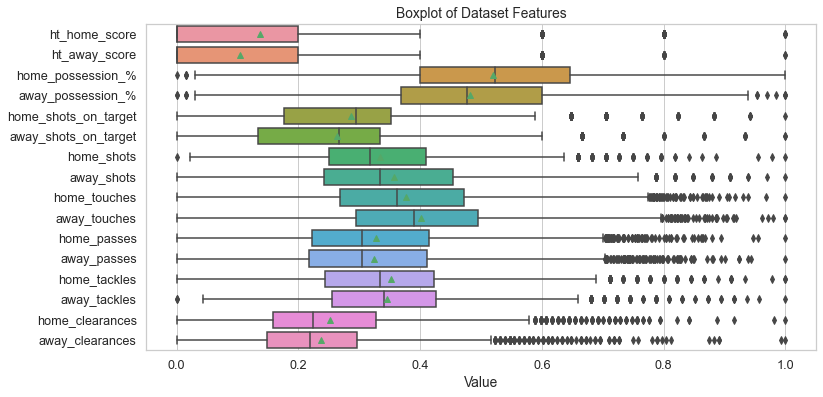

In [630]:
plot_box(data = df.iloc[:,4:20],
         labels = df.iloc[:, 4:20].columns.tolist(),
         title='Boxplot of Dataset Features')

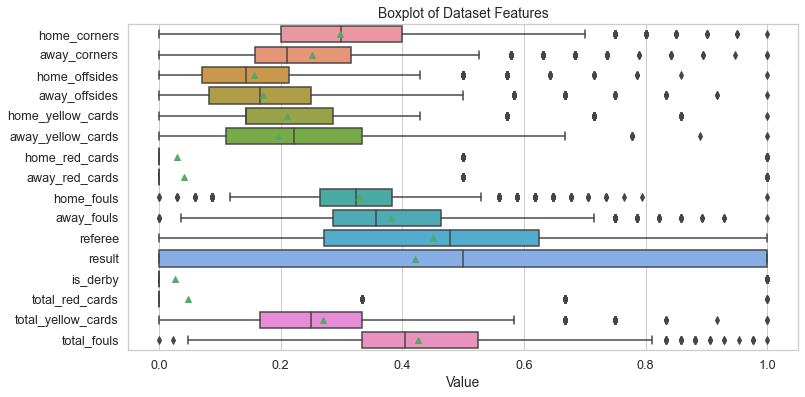

In [631]:
plot_box(data = df.iloc[:,20:36],
         labels = df.iloc[:, 20:36].columns.tolist(),
         title='Boxplot of Dataset Features')

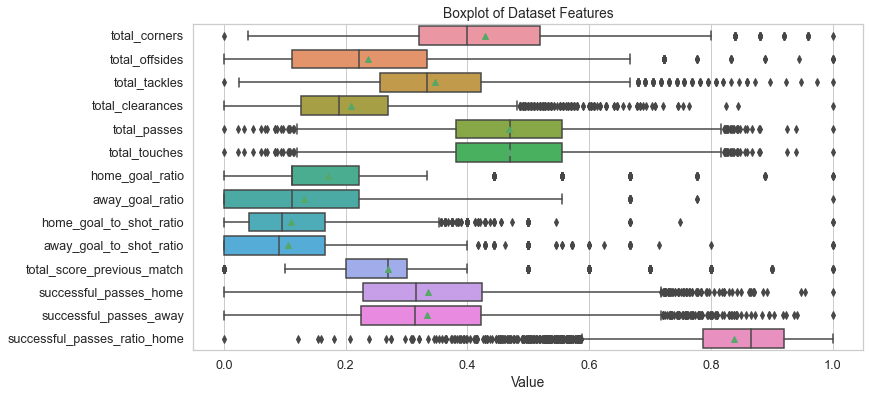

In [632]:
plot_box(data = df.iloc[:, 36:50],
         labels = df.iloc[:, 36:50].columns.tolist(),
         title='Boxplot of Dataset Features')

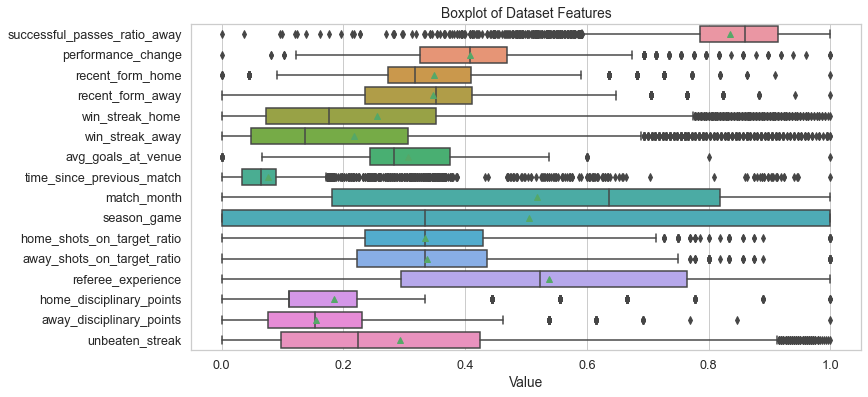

In [633]:
plot_box(data = df.iloc[:, 50:66],
         labels = df.iloc[:, 50:66].columns.tolist(),
         title='Boxplot of Dataset Features')

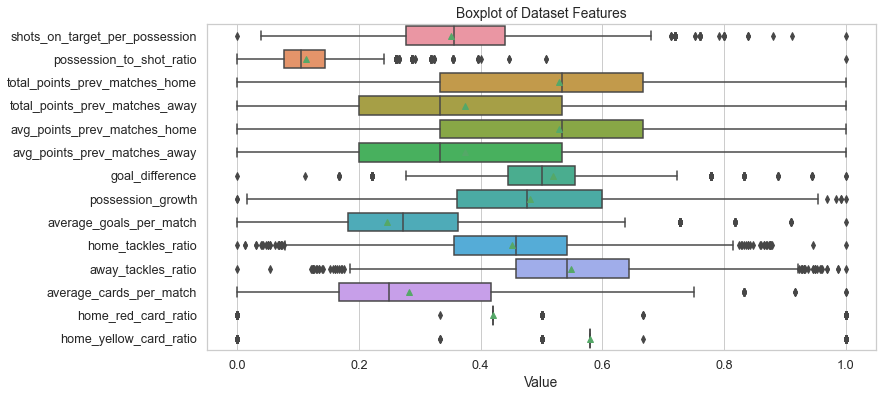

In [634]:
plot_box(data = df.iloc[:, 66:80],
         labels = df.iloc[:, 66:80].columns.tolist(),
         title='Boxplot of Dataset Features')

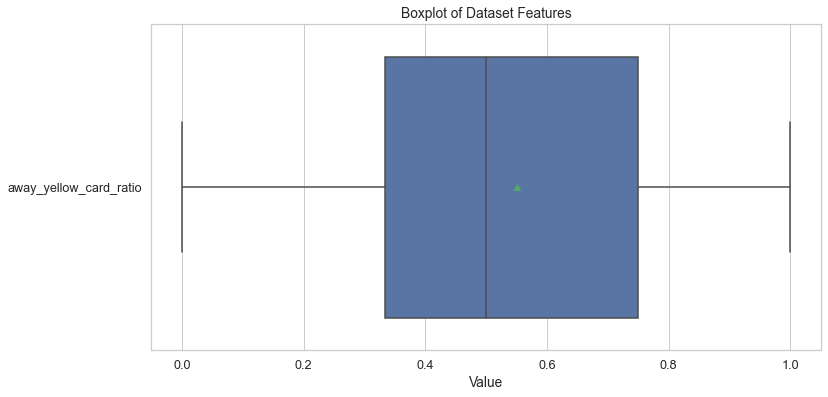

In [635]:
plot_box(data = df.iloc[:, 80:],
         labels = df.iloc[:, 80:].columns.tolist(),
         title='Boxplot of Dataset Features')

## Distribusi Data

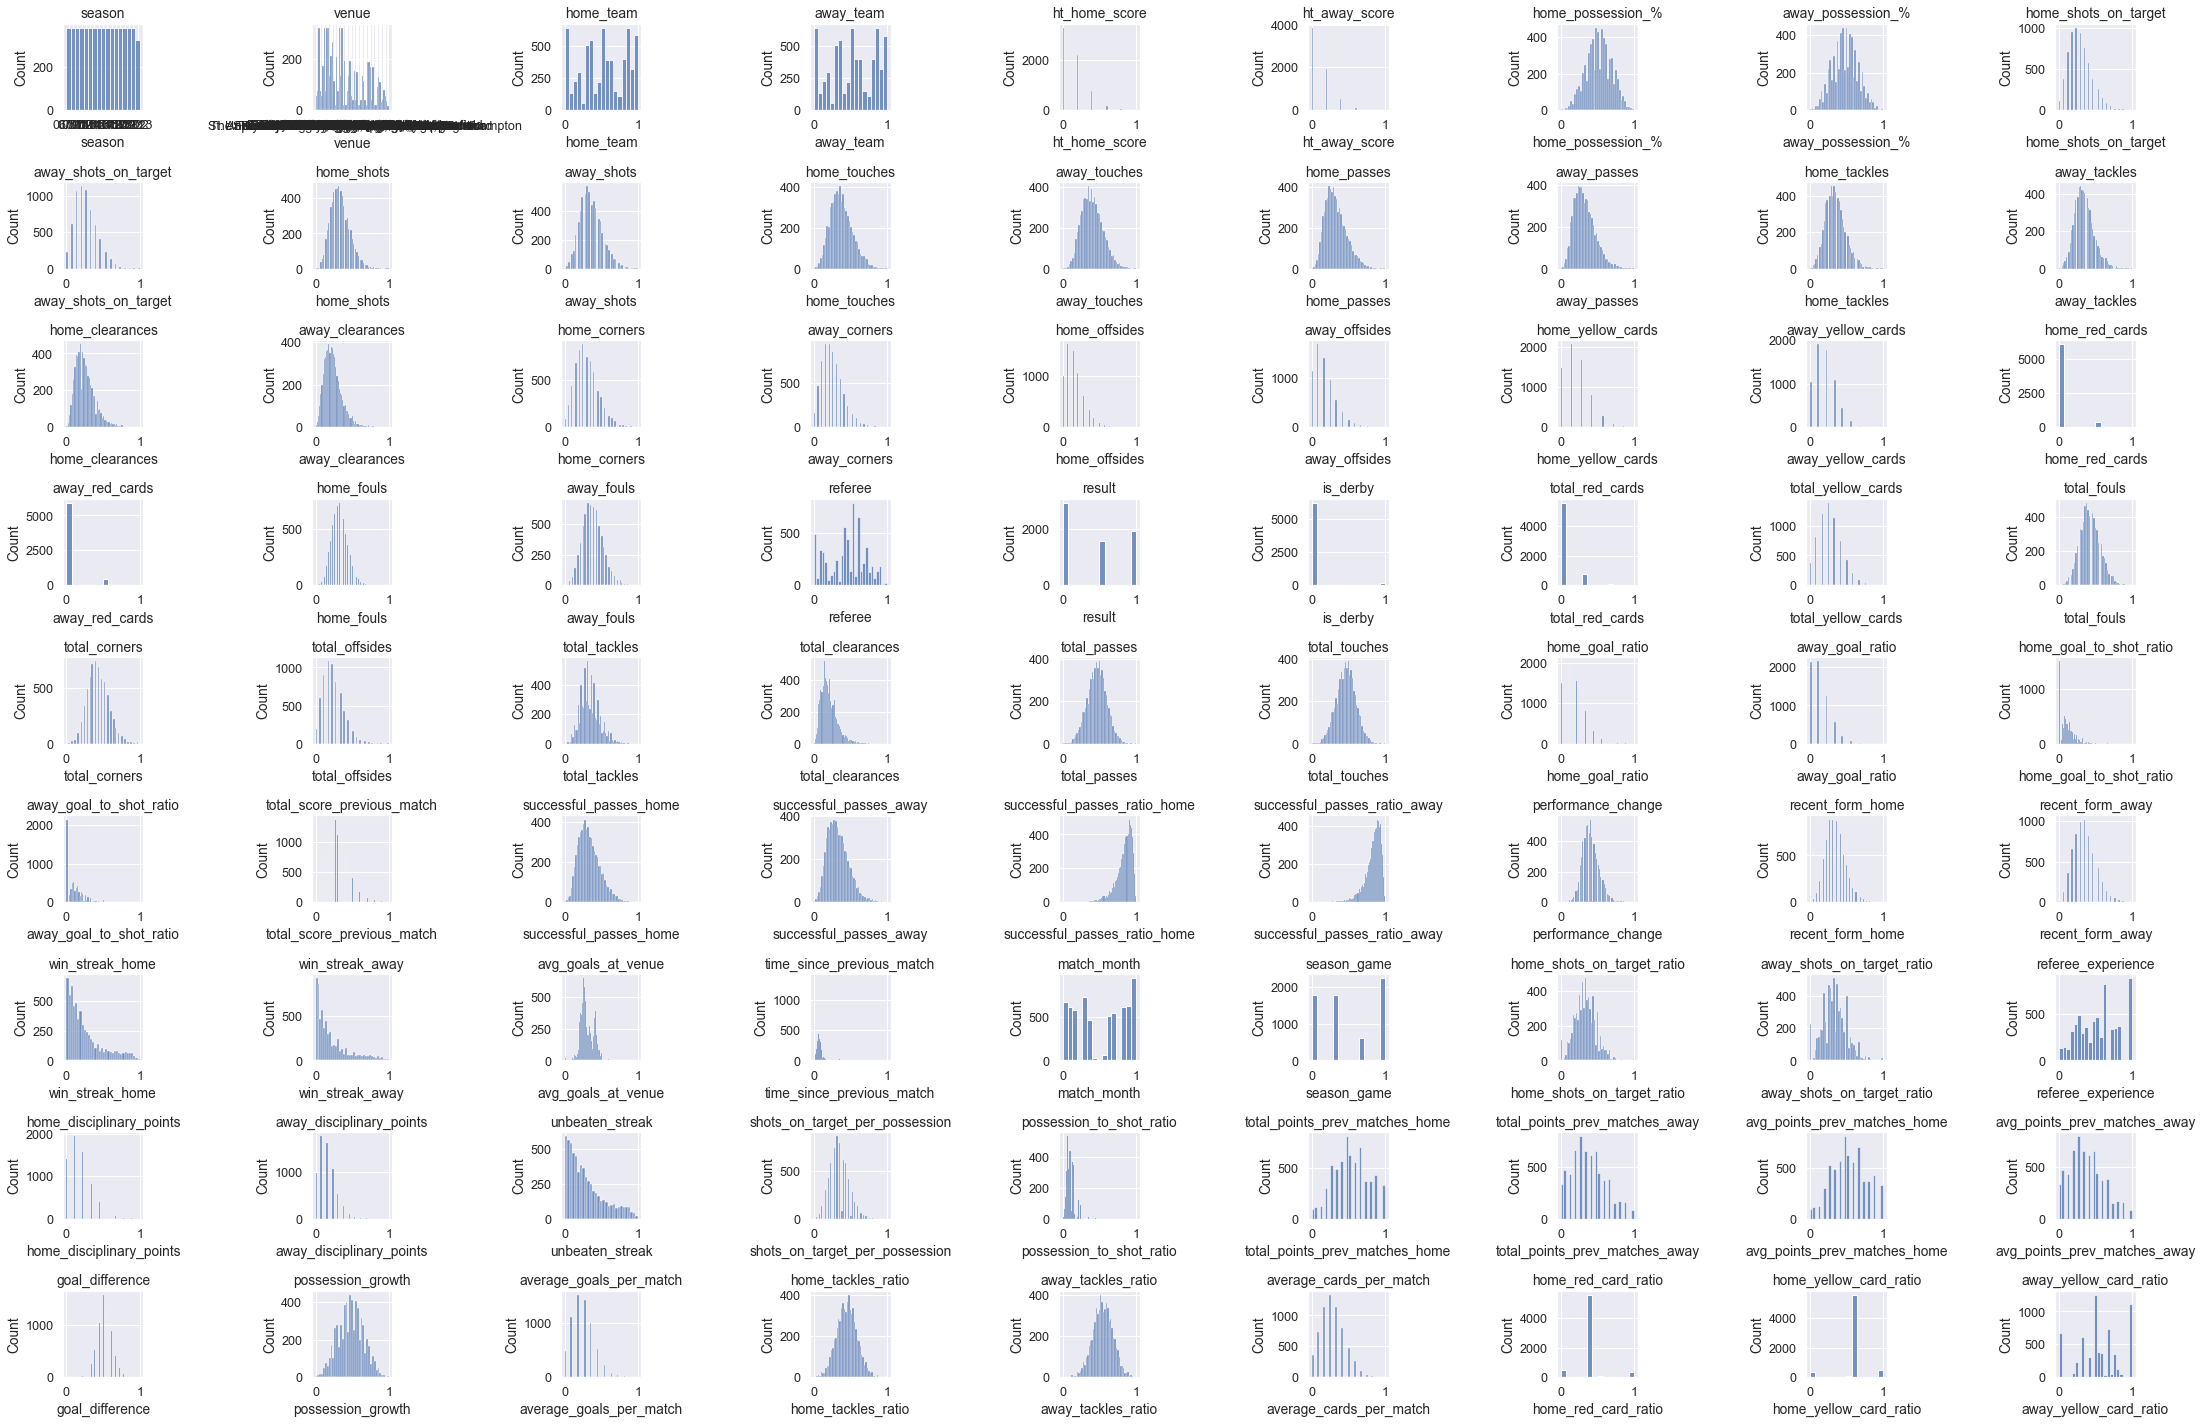

In [643]:
data = df.iloc[:, :]

rows = 9
cols = 9

fig, axes = plt.subplots(rows, cols, figsize=(30, 20))

# Melakukan flatten pada axes supaya mempermudah iterasi
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(data.columns):
        sns.histplot(data=data, x=data.columns[i], ax=ax)
        ax.set_title(data.columns[i])
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

## Heatmap

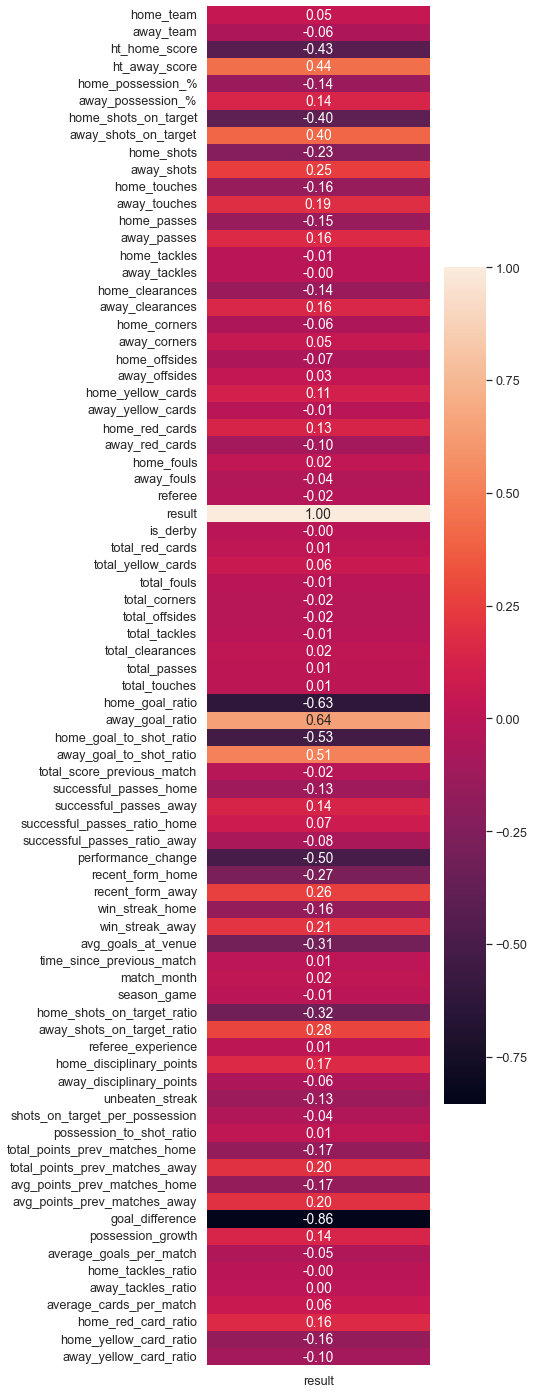

In [637]:
# heatmap correlation
corr = df.iloc[:,:].corr()

plt.figure(figsize=(5, 25)) 
sns.set(font_scale=1.15)  
sns.heatmap(corr.loc[['result']].T, annot=True, fmt=".2f")
plt.show()

Dari correlation matrix diatas : 
- Home & Away Features :
    - home_team & away_team
    - ht_home_score & ht_away_score

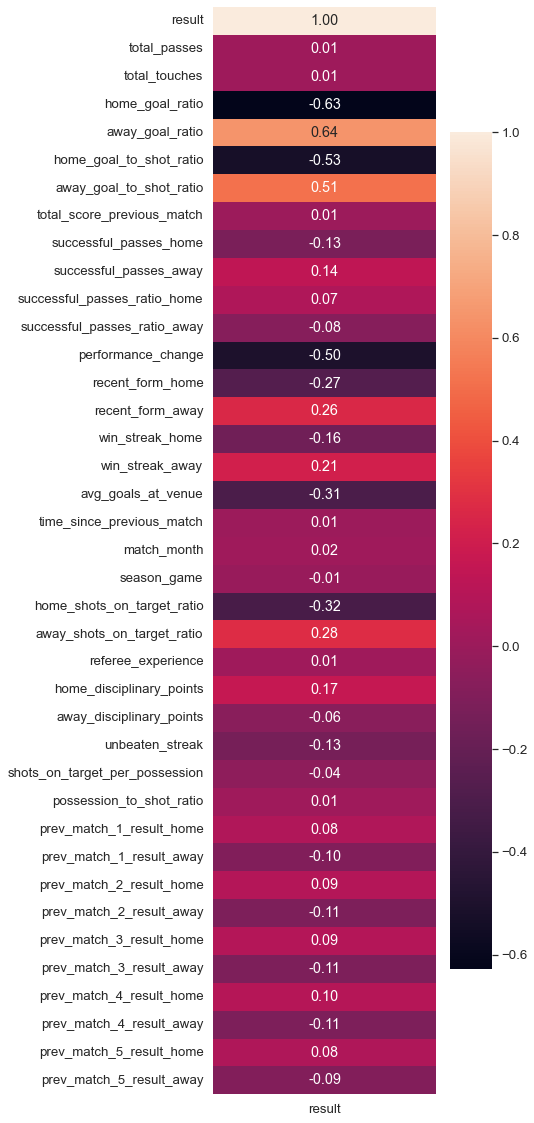

In [344]:
# Menghitung korelasi
corr = df.corr()

# Mengatur nilai ambang untuk korelasi yang diinginkan
threshold = 0.20
selected_columns_corr = corr.loc[(corr['result'] < -threshold) | (corr['result'] > threshold), :].index.tolist()

# Menambahkan kolom 'result' ke dalam daftar kolom yang dipilih
selected_columns_corr.append('result')

# Memilih DataFrame yang hanya berisi kolom yang dipilih
selected_df_corr = df[selected_columns_corr]

# Menghitung korelasi untuk DataFrame yang dipilih
corr_matrix = selected_df_corr.corr()

# Membuat heatmap korelasi
plt.figure(figsize=(5, 20))
sns.set(font_scale=1.2)
sns.heatmap(corr_matrix.loc[['result'], :].T, annot=True, fmt=".2f")
plt.show()

Korelasi (+) :
- 

## Check Multikolinearitas

In [22]:
X = df[df.iloc[:, 2:28].columns.tolist()]

# Tambahkan sebuah konstanta pada dataframe (prasyarat perhitungan)
X = add_constant(X)

# VIF dataframe
vif_data = pd.DataFrame()

# Hitung VIF tiap fitur
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data = vif_data[vif_data['feature'] != 'const']

display(vif_data)

,feature,VIF
1,ht_home_score,1.315984
2,ht_away_score,1.322641
3,home_possession_%,1393.958652
4,away_possession_%,1402.016562
5,home_shots_on_target,2.246253
6,away_shots_on_target,2.162686
7,home_shots,2.908864
8,away_shots,2.786380
9,home_touches,66.140620
10,away_touches,65.156773


In [23]:
df.head()

,home_team,away_team,ht_home_score,ht_away_score,home_possession_%,away_possession_%,home_shots_on_target,away_shots_on_target,home_shots,away_shots,home_touches,away_touches,home_passes,away_passes,home_tackles,away_tackles,home_clearances,away_clearances,home_corners,away_corners,home_offsides,away_offsides,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_fouls,away_fouls,result
0,32,21,0,0,0.41,0.58,1,4,6,15,451,569,272,366,22,29,64,39,0,12,3,5,1,2,0,0,12,17,1
1,29,3,1,0,0.44,0.55,11,3,21,8,415,527,279,327,23,19,15,28,6,2,5,0,2,0,0,1,22,17,0
2,15,38,1,0,0.46,0.53,2,7,8,13,460,493,288,321,17,24,61,32,0,6,5,1,2,2,0,0,12,15,0
3,26,41,1,0,0.55,0.44,5,4,8,13,519,448,352,278,27,33,15,16,4,11,6,3,1,2,0,0,18,19,0
4,31,25,2,2,0.52,0.47,8,7,14,11,515,441,335,328,23,28,9,18,8,2,0,1,1,3,0,0,7,16,0


In [24]:
df.iloc[:, 2:-1].columns

Index(['ht_home_score', 'ht_away_score', 'home_possession_%',
       'away_possession_%', 'home_shots_on_target', 'away_shots_on_target',
       'home_shots', 'away_shots', 'home_touches', 'away_touches',
       'home_passes', 'away_passes', 'home_tackles', 'away_tackles',
       'home_clearances', 'away_clearances', 'home_corners', 'away_corners',
       'home_offsides', 'away_offsides', 'home_yellow_cards',
       'away_yellow_cards', 'home_red_cards', 'away_red_cards', 'home_fouls',
       'away_fouls'],
      dtype='object')

## Scaling

In [25]:
scaler = MinMaxScaler()
cols = df.iloc[:, 2:-1].columns
df[cols] = scaler.fit_transform(df[cols])

In [26]:
df.head()

,home_team,away_team,ht_home_score,ht_away_score,home_possession_%,away_possession_%,home_shots_on_target,away_shots_on_target,home_shots,away_shots,home_touches,away_touches,home_passes,away_passes,home_tackles,away_tackles,home_clearances,away_clearances,home_corners,away_corners,home_offsides,away_offsides,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_fouls,away_fouls,result
0,32,21,0.0,0.0,0.369231,0.630769,0.058824,0.266667,0.136364,0.454545,0.140606,0.334550,0.136047,0.263285,0.422222,0.553191,0.598131,0.296875,0.0,0.631579,0.214286,0.416667,0.142857,0.222222,0.0,0.0,0.352941,0.571429,1
1,29,3,0.2,0.0,0.415385,0.584615,0.647059,0.200000,0.477273,0.242424,0.096970,0.283455,0.144186,0.216184,0.444444,0.340426,0.140187,0.210938,0.3,0.105263,0.357143,0.000000,0.285714,0.000000,0.0,0.5,0.647059,0.571429,0
2,15,38,0.2,0.0,0.446154,0.553846,0.117647,0.466667,0.181818,0.393939,0.151515,0.242092,0.154651,0.208937,0.311111,0.446809,0.570093,0.242188,0.0,0.315789,0.357143,0.083333,0.285714,0.222222,0.0,0.0,0.352941,0.500000,0
3,26,41,0.2,0.0,0.584615,0.415385,0.294118,0.266667,0.181818,0.393939,0.223030,0.187348,0.229070,0.157005,0.533333,0.638298,0.140187,0.117188,0.2,0.578947,0.428571,0.250000,0.142857,0.222222,0.0,0.0,0.529412,0.642857,0
4,31,25,0.4,0.4,0.538462,0.461538,0.470588,0.466667,0.318182,0.333333,0.218182,0.178832,0.209302,0.217391,0.444444,0.531915,0.084112,0.132812,0.4,0.105263,0.000000,0.083333,0.142857,0.333333,0.0,0.0,0.205882,0.535714,0


## Modelling

### Spliting Data

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.iloc[:, :-1]
y = df['result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forrest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

### Hyperparameter Tuning

In [29]:
param_distributions = {'n_estimators': [10, 50, 100, 200],
                       'max_depth': [None, 5, 10, 20],
                       'min_samples_split': [2, 5, 10],
                       'min_samples_leaf': [1, 2, 4]}

In [30]:
random_search = RandomizedSearchCV(rfc, param_distributions, n_iter=10, cv=5, error_score='raise')
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=RandomForestClassifier(n_estimators=1000),
                   param_distributions={'max_depth': [None, 5, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200]})

In [31]:
rfc_hyper = random_search.best_estimator_
rfc_hyper.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10)

### Evaluation

In [32]:
y_pred_rfc = rfc_hyper.predict(X_test)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)

print(f"Predict. results : {y_pred_rfc}")
print(f"Accuracy : {accuracy_rfc}")

Predict. results : [0 0 0 ... 2 2 0]
Accuracy : 0.6775956284153005


In [33]:
# 'result': {'W':0, 'D':1, 'L':2}

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.72      0.87      0.79       596
           1       0.53      0.24      0.33       315
           2       0.66      0.74      0.70       370

    accuracy                           0.68      1281
   macro avg       0.64      0.62      0.60      1281
weighted avg       0.65      0.68      0.65      1281



[[0.40472643 0.31247776 0.28279581]]


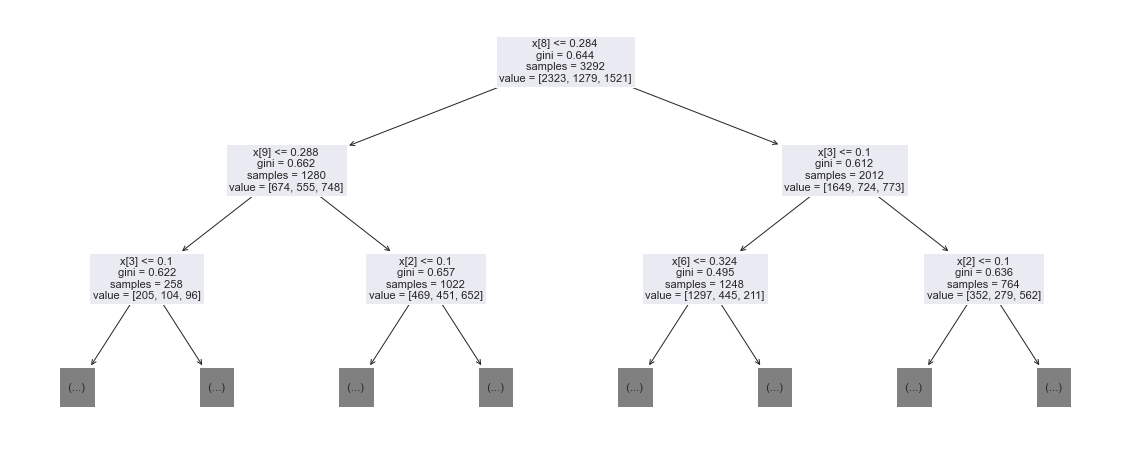

In [51]:
# Plot decision tree pertama di random forest
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(rfc_hyper.estimators_[0], max_depth=2, ax=ax)
# Untuk memvisualisasikan probabilitas kelas di setiap node, gunakan metode `predict_proba` di seluruh random forest
# Misalnya untuk memprediksi probabilitas kelas untuk contoh pertama dalam test set:
probs = rfc_hyper.predict_proba(X_test[:1])
print(probs)

In [35]:
y_pred_proba = rfc_hyper.predict_proba(X_test)[:, 1]
y_pred_proba

array([0.31247776, 0.16820202, 0.29957126, ..., 0.25532029, 0.34232792,
       0.10264778])

Text(0.5, 1.0, 'Confusion Matrix')

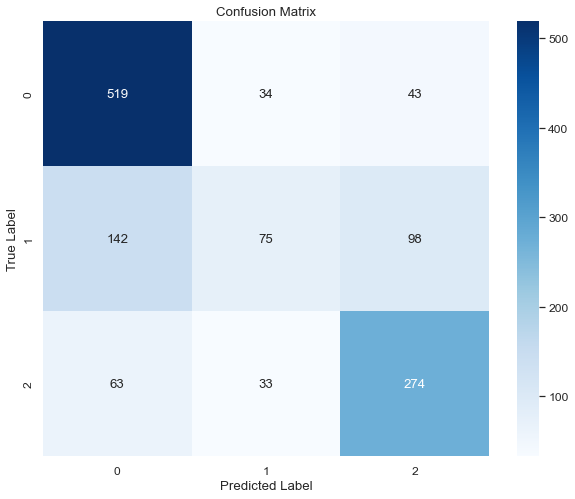

In [37]:
conf_matrix = confusion_matrix(y_test, y_pred_rfc)
# Plot confusion matrix

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

## Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

model_lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

param_dist = {
    'C': uniform(loc=0, scale=4),
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

random_search_lr_best = RandomizedSearchCV(model_lr, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
random_search_lr_best.fit(X_train, y_train)

c:\Users\marse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\marse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\marse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\marse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\marse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=1000,
                                                multi_class='multinomial'),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A7F845A020>,
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42)

In [66]:
best_model_lr = random_search_lr_best.best_estimator_
best_model_lr.fit(X_train, y_train)

y_pred_lr_best = best_model_lr.predict(X_test)
accuracy_lr_best = accuracy_score(y_test, y_pred_lr_best)

print(f"Predict. results : {y_pred_lr_best}")
print(f"Accuracy : {accuracy_lr_best}")

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr_best))

Predict. results : [0 0 0 ... 2 2 0]
Accuracy : 0.6799375487900078
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       596
           1       0.45      0.26      0.33       315
           2       0.66      0.76      0.71       370

    accuracy                           0.68      1281
   macro avg       0.62      0.62      0.61      1281
weighted avg       0.65      0.68      0.66      1281



c:\Users\marse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Text(0.5, 1.0, 'Confusion Matrix')

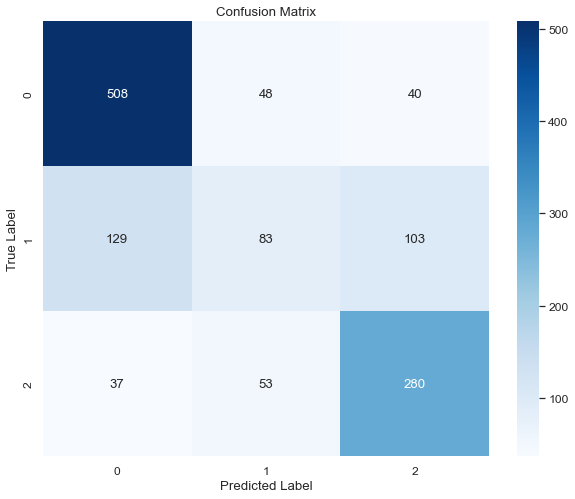

In [67]:
conf_matrix = confusion_matrix(y_test, y_pred_lr_best)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')